In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

2023-08-22 11:08:22.736225: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


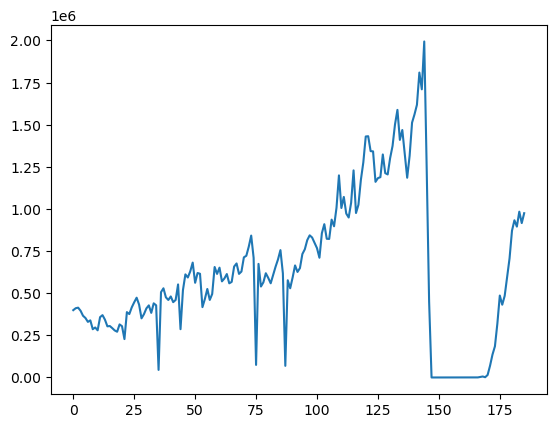

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + VISITOR ATTENTION INDEX +TOPIC AND SENTIMENT INTENSITY - DATA COMPOSITION 3 (90-5-5).csv')
df1 = df.drop(['Class'], axis=1)
df1 = df1['Tourist Arrival']
df1 = np.array(df1).reshape(-1,1)
df1
plt.plot(df1)

In [3]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(df1)
df1.min()

0.0

In [4]:
train_size = 168
validation_size = 9
test_size = 9

In [5]:
train = df1[0:168, :]
train.shape

(168, 1)

In [6]:
validation = df1[169:177, :]
validation.shape

(8, 1)

In [7]:
test = df1[177:186, :]
test.shape

(9, 1)

In [8]:
def get_data(df1, look_back):
    dataX, dataY = [], []
    for i in range (len(df1)-look_back-1):
        a = df1[i:(i+look_back),0]
        dataX.append(a)
        dataY.append(df1[i+look_back, 0])
    return np.array(dataX), np.array(dataY)

In [9]:
look_back = 1
x_train, y_train = get_data(train, look_back)

In [10]:
x_test, y_test = get_data(test, look_back)

In [11]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [12]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(12, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer =Adam(learning_rate=0.005))
history = model.fit(x_train, y_train, epochs=50, batch_size=1)
model.summary()

2023-08-22 11:08:26.585221: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50
166/166 [==============================] - 3s 4ms/step - loss: 0.0360
Epoch 2/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0089
Epoch 3/50
166/166 [==============================] - 1s 4ms/step - loss: 0.0079
Epoch 4/50
166/166 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 5/50
166/166 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 6/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 7/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 8/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 9/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 10/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 11/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0071
Epoch 12/50
166/166 [==============================] - 0s 2ms/step - loss: 0.0070
Epoch 13/50
166/166 [====

In [13]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 484ms/step


In [14]:
scaler.scale_

array([5.01473077e-07])

In [15]:
y_pred = scaler.inverse_transform(y_pred)

In [16]:
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

In [17]:
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

In [18]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 112303.382267076


In [19]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 100223.71428571429


In [20]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 0.12655764061066216


In [21]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 13.780859021947943


In [22]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : 14.5934114668675


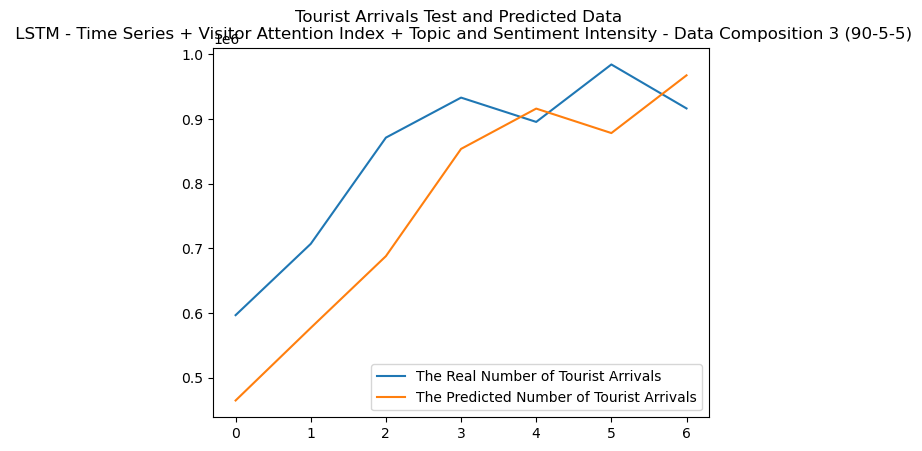

In [23]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n LSTM - Time Series + Visitor Attention Index + Topic and Sentiment Intensity - Data Composition 3 (90-5-5)")
plt.legend()
plt.show()